# Mortalidad en accidentes de tránsito

In [1]:
# Tratamiento de datos
import pandas as pd
import numpy as np
import csv
import seaborn as sn

# Gráficos
import matplotlib.pyplot as plt

# Preprocesado y modelado
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

Leemos el conjunto de datos.

In [2]:
df = pd.read_csv("dataset/seatbelts.csv") 

Visualizamos nuestro conjunto de datos.

In [3]:
df

,DriversKilled,drivers,front,rear,kms,PetrolPrice,VanKilled,law
0,107,1687,867,269,9059,0.102972,12,0
1,97,1508,825,265,7685,0.102363,6,0
2,102,1507,806,319,9963,0.102062,12,0
3,87,1385,814,407,10955,0.100873,8,0
4,119,1632,991,454,11823,0.101020,10,0
...,...,...,...,...,...,...,...,...
187,96,1284,644,521,21626,0.114797,5,1
188,122,1444,643,429,20195,0.114093,7,1
189,120,1575,641,408,19928,0.116466,7,1
190,137,1737,711,490,18564,0.116026,4,1


In [4]:
df.describe()

,DriversKilled,drivers,front,rear,kms,PetrolPrice,VanKilled,law
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,122.802083,1670.307292,837.218750,401.208333,14993.604167,0.103624,9.057292,0.119792
std,25.379886,289.610958,175.098967,83.102210,2938.049207,0.012176,3.636903,0.325567
min,60.000000,1057.000000,426.000000,224.000000,7685.000000,0.081179,2.000000,0.000000
25%,104.750000,1461.750000,715.500000,344.750000,12685.000000,0.092577,6.000000,0.000000
50%,118.500000,1631.000000,828.500000,401.500000,14987.000000,0.104477,8.000000,0.000000
75%,138.000000,1850.750000,950.750000,456.250000,17202.500000,0.114056,12.000000,0.000000
max,198.000000,2654.000000,1299.000000,646.000000,21626.000000,0.133027,17.000000,1.000000


In [5]:
df.shape

(192, 8)

Como la tarea principal del conjunto de datos se centrará en el antes y el después de la introducción de la legislación sobre el cinturón de seguridad, es conveniente dividir el conjunto de datos en dos: 
* uno de antes de la legislación (etiquetado como law=0)
* y uno de después de la legislación (etiquetado como law=1)

Así pues, primero cuántos datos hay en cada uno de estos conjuntos.

In [6]:
print(df.groupby('law').size())

law
0    169
1     23
dtype: int64


<AxesSubplot:>

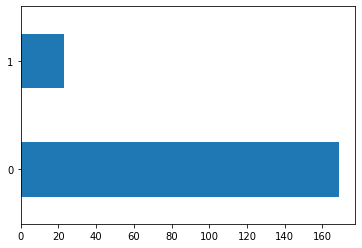

In [7]:
df['law'].value_counts().plot(kind='barh')

Y luego separamos los datos en dos dataframes distintos.

In [8]:
sinley = df.loc[df['law'] == 0] # Con un tamaño de 169 entradas.

In [9]:
sinley.head(5)

,DriversKilled,drivers,front,rear,kms,PetrolPrice,VanKilled,law
0,107,1687,867,269,9059,0.102972,12,0
1,97,1508,825,265,7685,0.102363,6,0
2,102,1507,806,319,9963,0.102062,12,0
3,87,1385,814,407,10955,0.100873,8,0
4,119,1632,991,454,11823,0.101020,10,0


In [10]:
conley = df.loc[df['law'] == 1] # Con un tamaño de 23 entradas.

In [11]:
conley.head(5)

,DriversKilled,drivers,front,rear,kms,PetrolPrice,VanKilled,law
169,95,1057,426,300,15511,0.113657,3,1
170,100,1218,475,318,18308,0.113144,2,1
171,89,1168,556,391,17793,0.118496,6,1
172,82,1236,559,398,19205,0.117969,3,1
173,89,1076,483,337,19162,0.117687,7,1


Contamos el número de personas en cada uno de los conjuntos.

In [12]:
sinley['drivers'].sum()

290300

In [13]:
conley['drivers'].sum()

30399

Contamos el número de personas muertas en cada uno de los conjuntos.

In [14]:
sinley['DriversKilled'].sum()

21272

In [15]:
conley['DriversKilled'].sum()

2306

In [128]:
sinley['front'].sum()

147614

In [129]:
conley['front'].sum()

13132

In [131]:
147614/21272

6.939356901090636

In [132]:
13132/2306

5.694709453599306

In [126]:
21272/290300

0.07327592146055804

In [127]:
2306/30399

0.07585775847889734

In [123]:
sinley['DriversKilled']/sinley['DriversKilled'].sum()

0      0.005030
1      0.004560
2      0.004795
3      0.004090
4      0.005594
         ...   
164    0.005876
165    0.006440
166    0.006487
167    0.007146
168    0.005641
Name: DriversKilled, Length: 169, dtype: float64

In [125]:
survived_sex = pd.crosstab(index=df["law"], 
                           columns=df["DriversKilled"])

survived_sex

DriversKilled,60,79,81,82,84,86,87,89,90,92,...,168,169,170,171,178,180,183,187,190,198
law,,,,,,,,,,,,,,,,,,,,,
0,0,1,0,1,1,0,1,0,0,2,...,2,1,1,1,1,1,2,1,1,1
1,1,1,1,1,2,1,1,2,1,1,...,0,0,0,0,0,0,0,0,0,0


In [81]:
df['DriversKilled'].corr(df['front'])

0.7067596369693568

In [82]:
df['DriversKilled'].corr(df['rear'])

0.35335101854521506

In [83]:
df['DriversKilled'].corr(df['kms'])

-0.3211015934112098

In [84]:
df['DriversKilled'].corr(df['PetrolPrice'])

-0.3866060897572505

In [85]:
df['DriversKilled'].corr(df['VanKilled'])

0.40704116202241947

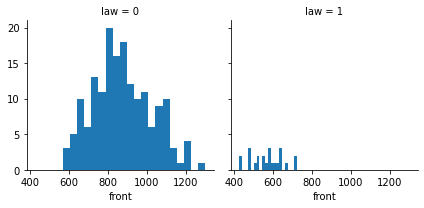

In [116]:
g = sn.FacetGrid(df, col='law')
g.map(plt.hist, 'front', bins=20)

In [119]:
my_tab = pd.crosstab(index=df["law"],  
                     columns="count")

my_tab

col_0,count
law,
0,169
1,23


In [122]:
my_tab/my_tab.sum()

col_0,count
law,
0,0.880208
1,0.119792


<function matplotlib.pyplot.show(close=None, block=None)>

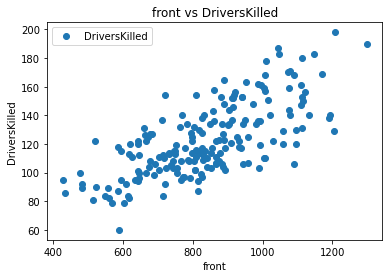

In [66]:
df.plot(x='front', y='DriversKilled',style='o')
plt.title('front vs DriversKilled')
plt.xlabel('front')
plt.ylabel('DriversKilled')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

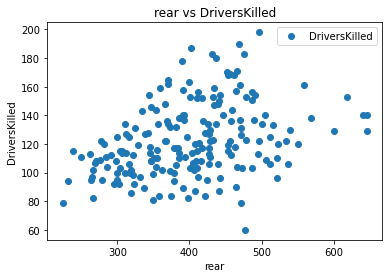

In [67]:
df.plot(x='rear', y='DriversKilled',style='o')
plt.title('rear vs DriversKilled')
plt.xlabel('rear')
plt.ylabel('DriversKilled')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

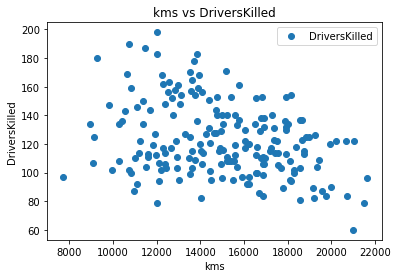

In [68]:
df.plot(x='kms', y='DriversKilled',style='o')
plt.title('kms vs DriversKilled')
plt.xlabel('kms')
plt.ylabel('DriversKilled')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

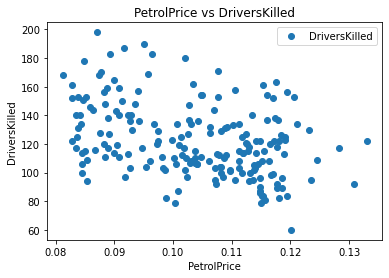

In [69]:
df.plot(x='PetrolPrice', y='DriversKilled',style='o')
plt.title('PetrolPrice vs DriversKilled')
plt.xlabel('PetrolPrice')
plt.ylabel('DriversKilled')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

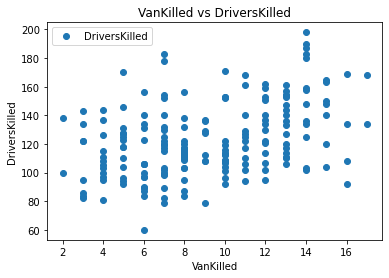

In [70]:
df.plot(x='VanKilled', y='DriversKilled',style='o')
plt.title('VanKilled vs DriversKilled')
plt.xlabel('VanKilled')
plt.ylabel('DriversKilled')
plt.show

In [104]:
X = df[['front', 'VanKilled', 'rear']] 
y = df['DriversKilled'] 

In [105]:
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [107]:
# Creamos el modelo.
modelo = LinearRegression()
# Entrenamos nuestro modelo.
modelo.fit(X_train, y_train)

LinearRegression()

In [108]:
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', modelo.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', modelo.intercept_)

Coefficients: 
 [ 0.09846026  0.8112459  -0.02777352]
Independent term: 
 44.12680291468945


In [109]:
# Realizamos predicciones usando el conjunto de prueba.
y_pred = modelo.predict(X_test)

modelo.score(X, y)

0.5119287518719995

In [110]:
dfp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

dfp

,Actual,Predicted
73,92,108.484510
79,106,121.840876
113,106,125.998280
172,82,90.545963
49,146,128.735215
58,152,130.819525
96,112,114.457790
104,97,115.981708
72,122,111.518325
166,138,116.286201


In [112]:
print("Mean Absolute Error: %.2f" % mean_absolute_error(y_test, y_pred))
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Mean Absolute Error: 13.90
Mean squared error: 279.32
Root Mean Squared Error: 16.71
Variance score: 0.56
